## EDA Chicago400 Notebook

In [1]:
# import necessary packages
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import os
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
# import pickled gdf for eda
bike_routes = pd.read_pickle('./data/pickle/bike_routes')
school_cook_county = pd.read_pickle('./data/pickle/school_cook_county')
daycare = pd.read_pickle('./data/pickle/daycare')
forestry = pd.read_pickle('./data/pickle/forestry')
parks = pd.read_pickle('./data/pickle/parks')
chicago_boundaries = pd.read_pickle('./data/pickle/chicago_boundaries')

In [3]:
# ensure all pickled gdf's were imported
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 forestry	 parks	 school_cook_county	 


### Preview chicago boundaries against Chicago basemap

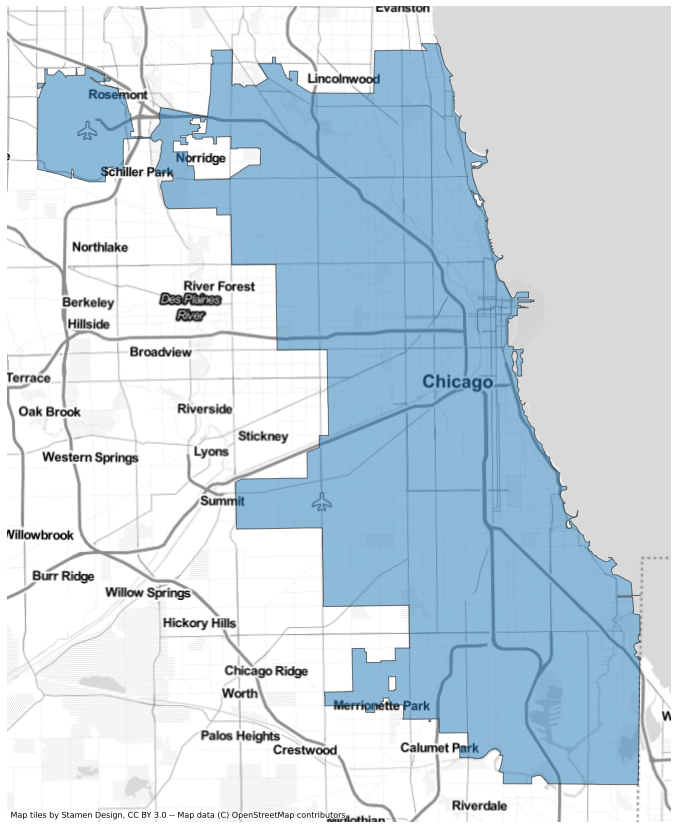

In [4]:
#add basemap with contextily
ax = chicago_boundaries.plot(figsize=(15,15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax,crs=32616,source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

### Segment Cook County data for Chicago

#### Use Clip to segment for schools

In [5]:
school_cook_chicago_clip = gpd.clip(school_cook_county,chicago_boundaries)

In [6]:
school_cook_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     2332 non-null   object  
 1   cfname      2332 non-null   object  
 2   cfsubtype   2332 non-null   object  
 3   cftype      2332 non-null   object  
 4   comment     141 non-null    object  
 5   community   2332 non-null   object  
 6   gniscode    2332 non-null   float64 
 7   jurisdicti  2154 non-null   object  
 8   mergeid     2332 non-null   object  
 9   shape_area  2332 non-null   float64 
 10  shape_len   2332 non-null   float64 
 11  source      2332 non-null   object  
 12  geometry    2332 non-null   geometry
dtypes: float64(3), geometry(1), object(9)
memory usage: 237.0+ KB


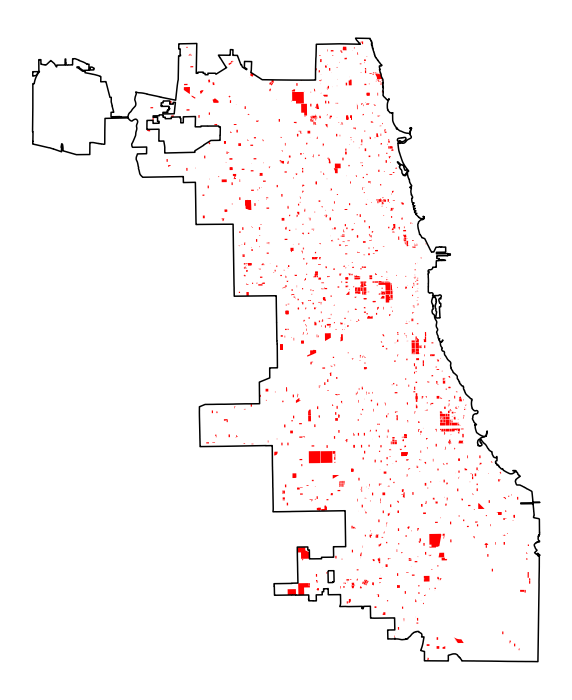

In [7]:
# clipped schools for chicago
basemap = chicago_boundaries.boundary.plot(color='k', figsize=(10,20))
school_cook_chicago_clip.plot(ax=basemap,color='red')
basemap.axis('off')
plt.show()

In [8]:
# export to pickle
school_cook_chicago_clip.to_pickle('./data/pickle/school_cook_chicago_clip')

# export to shapefile
school_cook_chicago_clip.to_file('./data/shp/school_cook_chicago_clip')

#### Use Clip to segment Daycare Centers for Chicago

In [9]:
# clip daycare to chicago boundary
daycare_chicago_clip = gpd.clip(daycare,chicago_boundaries)

In [10]:
daycare_chicago_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 332 to 935
Columns: 119 entries, pin10 to geometry
dtypes: float64(27), geometry(1), int64(8), object(83)
memory usage: 126.6+ KB


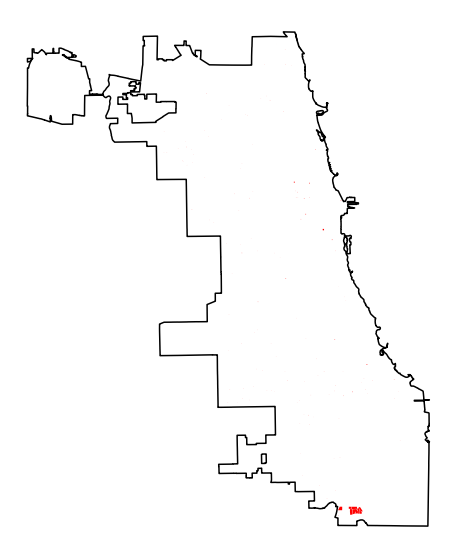

In [11]:
basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
daycare_chicago_clip.plot(color='red',ax=basemap)
basemap.axis('off')
plt.show()

In [12]:
# export pickle
daycare_chicago_clip.to_pickle('./data/pickle/daycare_chicago_clip')
# export shapefile
daycare_chicago_clip.to_file('./data/shp/daycare_chicago_clip')

In [13]:
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 daycare_chicago_clip	 forestry	 parks	 school_cook_chicago_clip	 school_cook_county	 


### Loop through each gdf to get basic map

In [14]:
# make a list of all chicago gdf
chicago_gdf = [bike_routes, daycare_chicago_clip,forestry,parks,school_cook_chicago_clip]

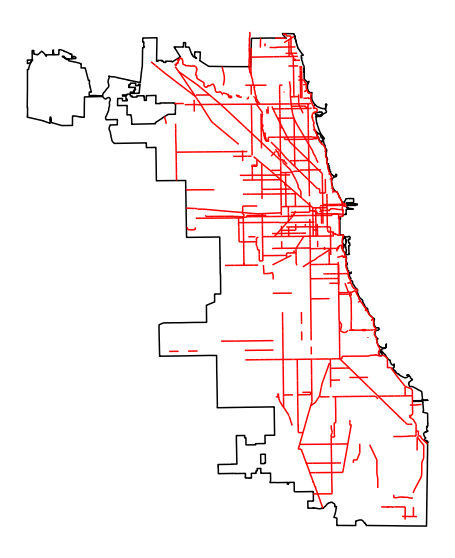

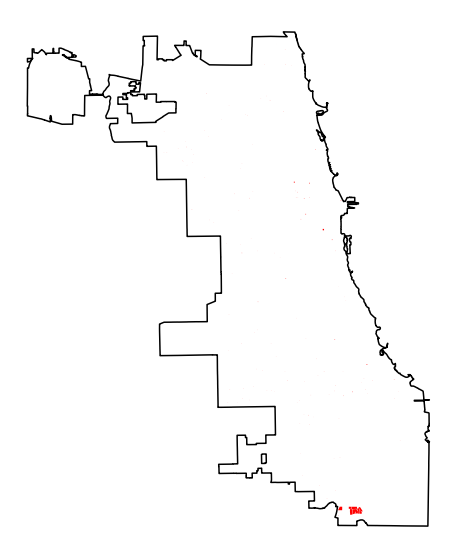

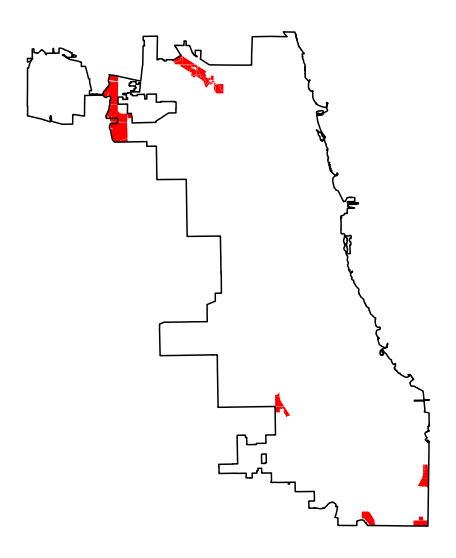

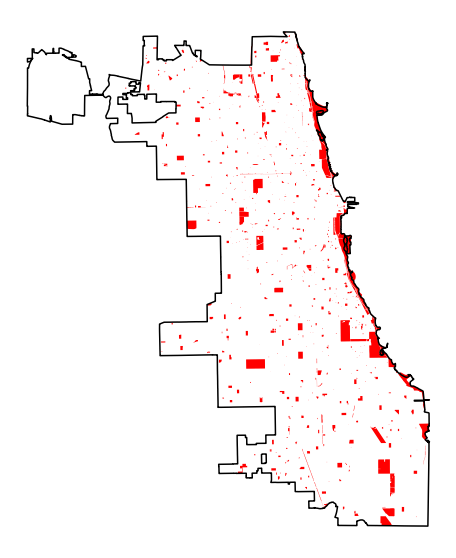

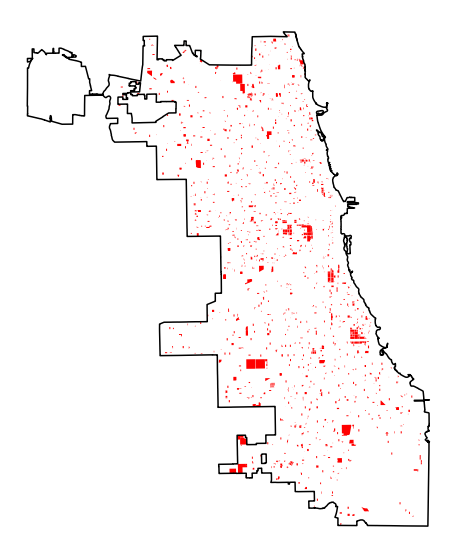

In [19]:
for gdf in chicago_gdf:
    basemap = chicago_boundaries.boundary.plot(color='k',figsize=(20,10))
    gdf.plot(color='red',ax=basemap)
    basemap.axis('off')
    plt.show()

### Combine all on one map

<function matplotlib.pyplot.show(close=None, block=None)>

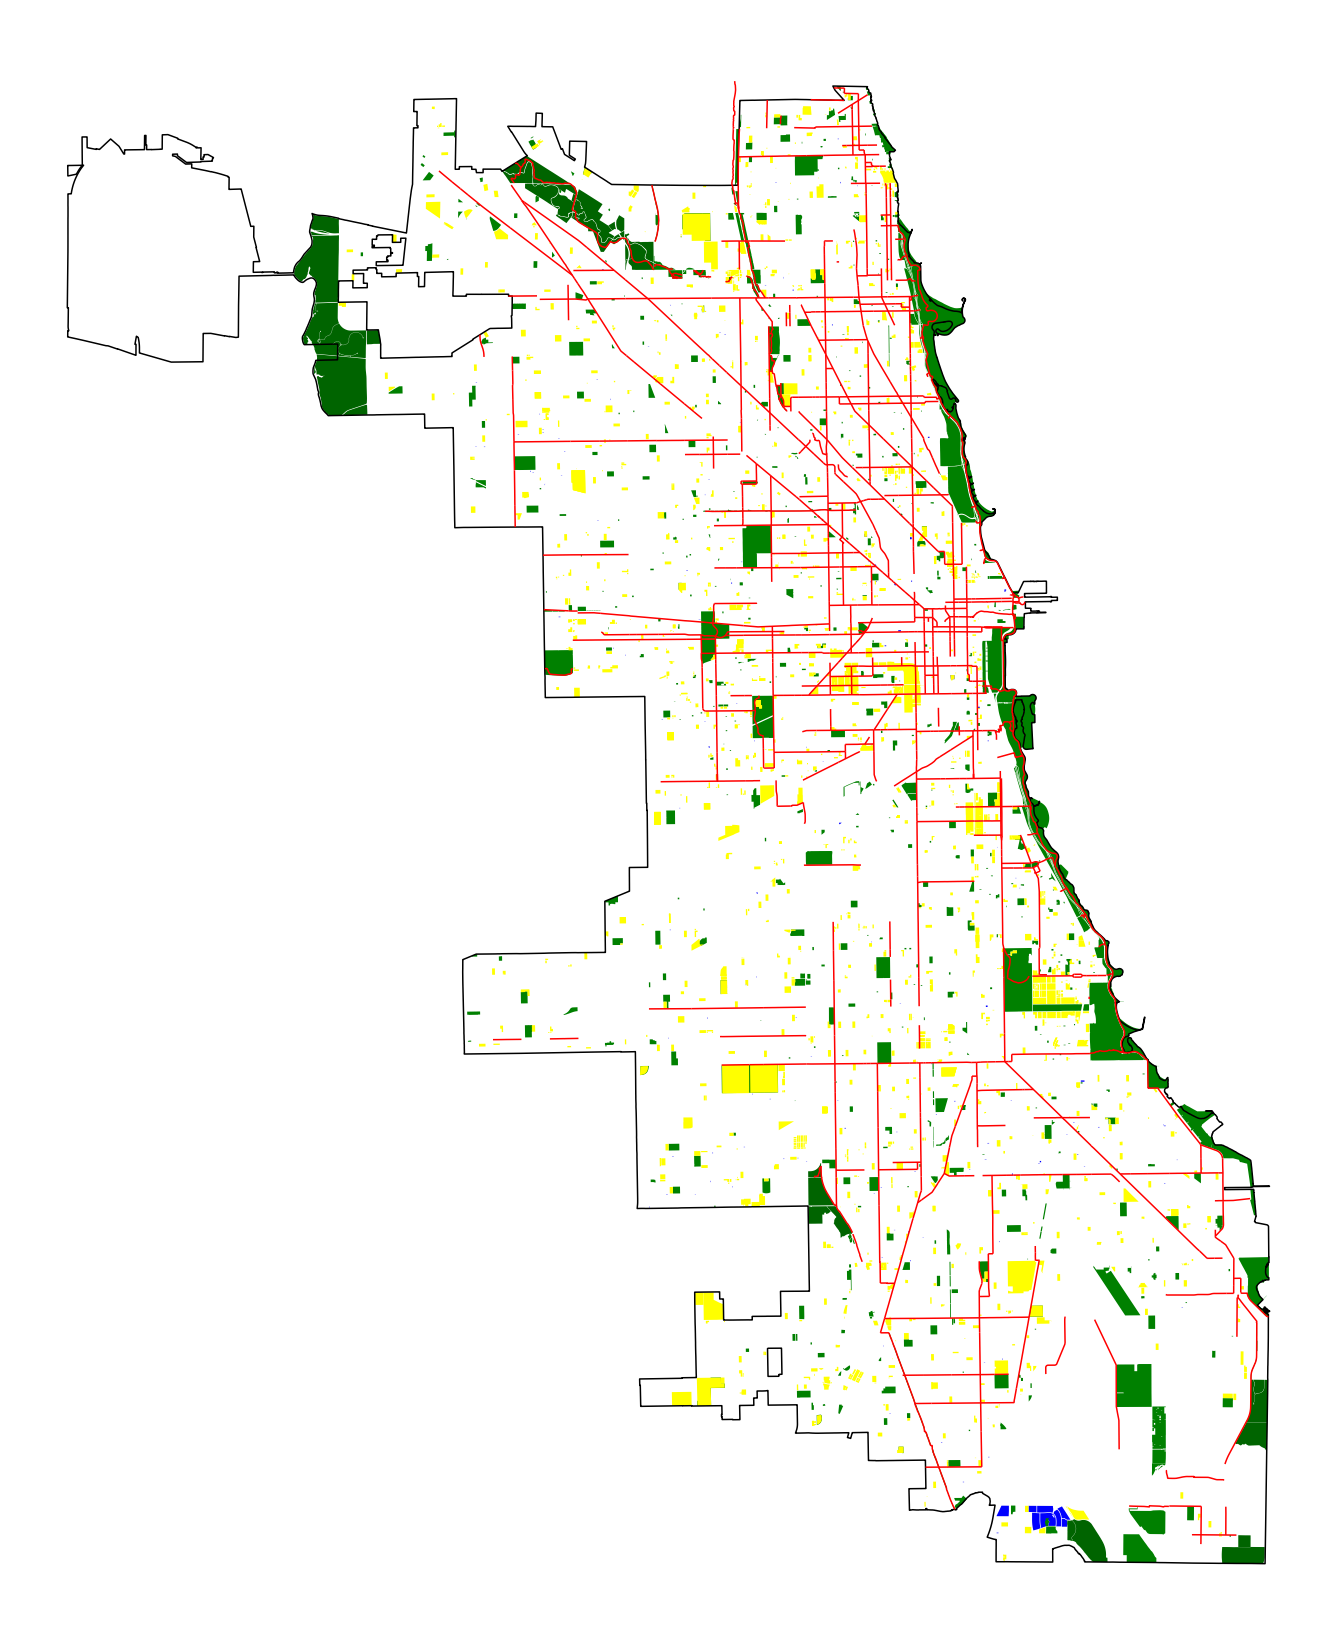

In [27]:
basemap = chicago_boundaries.boundary.plot(color='k',figsize=(30,30))
bike_routes.plot(color='red',ax=basemap)
daycare_chicago_clip.plot(color='blue', ax=basemap)
forestry.plot(color='darkgreen',ax=basemap)
parks.plot(color='green',ax=basemap)
school_cook_chicago_clip.plot(color='yellow',ax=basemap)
basemap.axis('off')
plt.show


### Next Steps
- pull in boundary data i.e. census tract, cook county, zip code etc by transforming in data gathering notebook and pickle
- maybe pinpoint the locations the convicted have to report to daily, and mark them on the map
- overlay each shapefile on base layer to start looking at some commonalities
- perhaps also look at soem boxplots/histograms and scatterplots
